In [31]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import wordcloud
%matplotlib inline
import pickle

In [32]:
with open('movie_dict.pickle', 'rb') as f:
    movie_dict = pickle.load(f)

In [33]:
movie = pd.DataFrame(list(movie_dict.items()),columns = ['movie_id','review'])

In [34]:
movie

,movie_id,review
0,1%의 어떤 것,살짝 억지스럽다 심하다 건전하다 깍이다 보기 좋다 드라마 사랑스럽다 일요일 아침 하...
1,25시,예전 리뷰 척박하다 현실 여과 드러내다 뛰어나다 리얼리즘 영화인 동시 진짜 부딪히다...
2,S.W.A.T. 특수기동대,개봉일 맞추다 기다리다 보다 나아지다 인내 하다 가다 화가 나다 아깝다 자리 박차다...
3,갱스 오브 뉴욕,년전 태어나다 보다 세상 약육강식 이다 진리 터득 국가 지금 미국 유럽일 강대국 되...
4,거짓말의 빛깔,하다 바닷가 마을 여자아이 성폭행 살해 당하다 사건 벌어지다 범인 지목 받다 화가 ...
...,...,...
12033,주글래 살래,영문 제목 품사 일치 돼다 영화 제대로 되다 없다 경이 느끼다 하다 스럽다 진짜 드...
12034,천방지축,호화 캐스팅 하다 보다 정말 어정쩡하다 장르 표본 코미디 액션 멜로 건지다 개인 최...
12035,콜드 크릭,무섭다 않다 나쁘다
12036,터미널,행크스 연기 하다 본인 자체 구분 만들다 매력 무조건 기다리다 다가 아니다 어떻다 ...


### tf-idf 행렬만들기

In [35]:
#tf-idf 행렬 만들기 
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf = TfidfVectorizer()

In [37]:
tfidf_matrix = tfidf.fit_transform(movie.review.astype(str))

In [38]:
tfidf_matrix.shape

(12038, 100380)

### 코사인 유사도 만들기 

In [39]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [40]:
indices = pd.Series(movie.index,index = movie.movie_id)

## 코사인 유사도 기반 영화 추천시스템 만들기

In [41]:
def movie_Recommendation(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    # 모든 영화에 대해서 해당 영화와의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True) # score 순으로 정렬

    sim_scores = sim_scores[1:11] # 가장 유사한 10개의 영화를 받아옴
    movie_indices = [i[0] for i in sim_scores] # 인덱스 받아오기
    
    result_df = movie.iloc[movie_indices].copy()  #기존에 읽어들인 데이터에서 해당 인덱스의 값을 가져오기 스코어 열을 추가
    result_df['score'] = [i[1] for i in sim_scores]
    
    # 가장 유사한 10개의 영화의 제목을 리턴
    return result_df

In [42]:
movie_Recommendation('이터널 선샤인')

,movie_id,review,score
1146,500일의 썸머,좋아하다 여자 아무 확신 먼저 데이트 신청 하다 어리석다 생각 남자 무모하다 안해 ...,0.361996
300,더 로드,참으로 간담 서늘하다 보다 정말 무섭다 시시하다 매리 구성 되다 현실 본론 들어가다...,0.324581
554,수면의 과학,빅뱅 처음 사소하다 감정 대폭발 끝나다 없다 마음 쓰기 그녀 점점 커지다 우주 되어...,0.320006
2060,라라랜드,라라 랜드 감독 다미 차젤레 출연 엠마 스톤 라이언 슬링 시몬 레전드 개봉 미국 평...,0.311405
1416,블라인드,영화 보고 어떻다 이렇다 평점 의문 몰입 되다 전개 하다 건지다 이해 이하 스포일러...,0.310135
1266,"시네도키, 뉴욕",찰리 카우프만 감독 기억 하다 많다 않다 미셀 드리다 영화 터널 선샤인 생각 되다 ...,0.306772
314,마더,마더 레이드 다니엘 크다 레이 로저 미첼 감독 남편 구두끈 묶다 아내 리조또 음식 ...,0.297532
243,비포 선셋,속편 개월 다시 만나다 하다 젊다 남녀 기억 마지막 만남 이후 재회 영화 뒷이야기 ...,0.296048
919,사과,하다 상대방 사과 그것 어긋나다 관계 회복 반대 결말 위해 사용 되다 경우 대한 종...,0.295780
2151,"나는 내일, 어제의 너와 만난다",내용 스포일러 포함 되어다 영화 보다 주의 하다 바라다 타카 토시 에미 상대방 살다...,0.294249


In [43]:
import re
import stylecloud
import collections


In [47]:
x = "C:\\Users\\jogj0630\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothicBold.ttf"

In [113]:
def creatplot(a):
    reclist = movie_Recommendation(a)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = reclist, y = 'movie_id', x ='score', palette="ch:s=-.6,r=.2")

    plt.show()


    indexmorphs = movie.loc[movie['movie_id'] == a].index[0]
    morphs = movie['review'][indexmorphs]
    morphs = re.sub('[^가-힣\s]*', '',str(morphs)).split(" ") # 형태소 분류
    textdict = collections.Counter(morphs) # 비율 dict 표현
    textdict[a] = max(textdict.values())*3 # 제목 비중 높이기
    stylecloud.gen_stylecloud(text = textdict, icon_name="fas fa-circle",palette='scientific.sequential.Acton_4',output_name="wordcloud.png", font_path=x)
    

영화를 입력하세요 : 이터널 선샤인


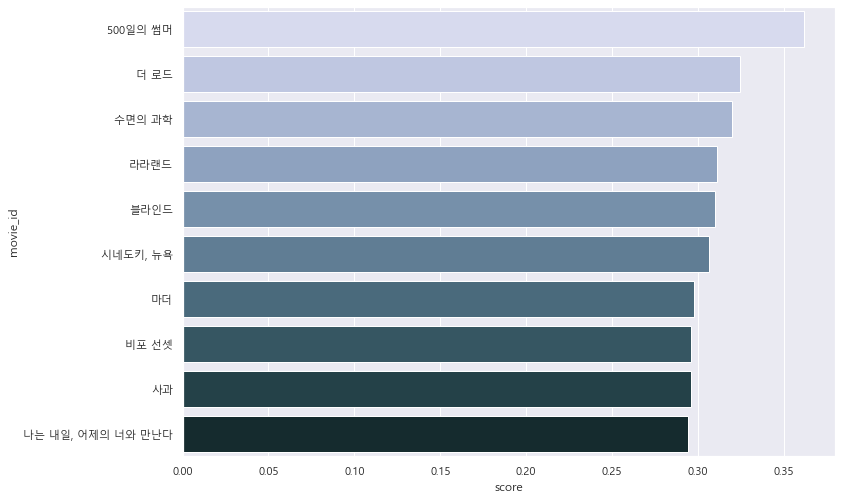

In [114]:
a = input("영화를 입력하세요 : ")
creatplot(a)